In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#load images
img = cv2.imread("/content/drive/MyDrive/Staj Çalışmaları/Örnek Kodlar/İmage Processing/Hücre Bölütleme/a2780_4.jpeg")
label = cv2.imread("/content/drive/MyDrive/Staj Çalışmaları/Örnek Kodlar/İmage Processing/Hücre Bölütleme/a2780_4_label.tif")

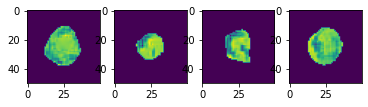

In [60]:
#grayscaling
label_gray = cv2.cvtColor(label, cv2.COLOR_RGB2GRAY)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
contours, hierarchy = cv2.findContours(label_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


cells = []

#fitting each cell in 50x50 frame
for c in contours:
  cell_rect = cv2.boundingRect(c)

  frame = np.zeros((50,50))

  pad_x = (50 - cell_rect[2]) // 2
  pad_y = (50 - cell_rect[3]) // 2

  for i in range(cell_rect[2]):
    x = cell_rect[0] + i
    for j in range(cell_rect[3]):
      y = cell_rect[1] + j
      is_in_contour = cv2.pointPolygonTest(c, (x,y), False)

      if is_in_contour>=0:
        frame[pad_x +i][pad_y + j] = img_gray[y,x]
        
  cells.append(frame)


#printing some random cells
plt.subplot(141)
plt.imshow(cells[2])

plt.subplot(142)
plt.imshow(cells[25])

plt.subplot(143)
plt.imshow(cells[12])

plt.subplot(144)
plt.imshow(cells[75])